In [2]:
# Importando bibliotecas
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Carregando os dados MNIST
mnist = fetch_openml('mnist_784', version=1)

c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X = mnist.data/255.0
y = mnist.target

In [14]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [26]:
# Construinfo o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(30,30), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1, activation='relu')

In [27]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.31417870
Iteration 2, loss = 0.14860297
Iteration 3, loss = 0.11826214
Iteration 4, loss = 0.10457220
Iteration 5, loss = 0.09254680
Iteration 6, loss = 0.08536179
Iteration 7, loss = 0.07704886
Iteration 8, loss = 0.07408344
Iteration 9, loss = 0.06971607
Iteration 10, loss = 0.06630054
Iteration 11, loss = 0.06257841
Iteration 12, loss = 0.05977172
Iteration 13, loss = 0.05811967
Iteration 14, loss = 0.05533870
Iteration 15, loss = 0.05380474
Iteration 16, loss = 0.05194994
Iteration 17, loss = 0.04903436
Iteration 18, loss = 0.04903882
Iteration 19, loss = 0.04613111
Iteration 20, loss = 0.04275307


c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 30), learning_rate_init=0.1, max_iter=20,
              random_state=1, solver='sgd', verbose=10)

In [28]:
y_pred = mlp.predict(X_test)

In [29]:
y_pred

array(['8', '4', '8', ..., '5', '2', '6'], dtype='<U1')

In [30]:
# Avaliando o modelo
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9618571428571429


In [31]:
y_test.values

['8', '4', '8', '7', '7', ..., '8', '6', '5', '2', '6']
Length: 7000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Previsões do modelo
y_pred = mlp.predict(X_test)

# Convertendo previsões e rótulos verdadeiros para inteiros
y_pred_int = np.array(y_pred).astype(int)
y_test_int = np.array(y_test).astype(int)

# Identificando índices de previsões corretas e incorretas
correct_indices = np.nonzero(y_pred_int == y_test_int)[0]
incorrect_indices = np.nonzero(y_pred_int != y_test_int)[0]

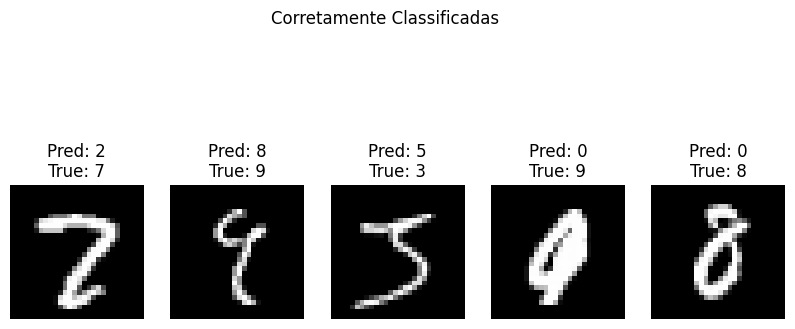

In [25]:
import  matplotlib.pyplot as plt
# Função para visualizar as imagens
def plot_images(indices, title):
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices[:5]):  # Mostrando apenas as primeiras 5 imagens
        plt.subplot(1, 5, i + 1)
        image = X_test.iloc[idx].values.reshape(28, 28)  # Redimensionando a imagem para 28x28
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_test.values[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualizando imagens corretamente classificadas
plot_images(incorrect_indices[:5], "Corretamente Classificadas")